# Traffic Light Detection

## Imports

In [1]:
import numpy as np
import os
import sys
import tensorflow as tf
import time

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
%matplotlib inline

In [2]:
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

In [3]:
LABEL_PATH = 'config/label_map.pbtxt'
SIM_MODEL_PATH = 'model_frozen_sim/frozen_inference_graph.pb'
REAL_MODEL_PATH = 'model_frozen_real/frozen_inference_graph.pb'
SIM_TEST_IMAGE_PATH = 'data/test_images/sim'
REAL_TEST_IMAGE_PATH = 'data/test_images/real'
IMAGE_SIZE = (12, 8)

In [4]:
label_map = label_map_util.load_labelmap(LABEL_PATH)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=4, use_display_name=True)
category_index = label_map_util.create_category_index(categories)
print(category_index)

{1: {'id': 1, 'name': 'Green'}, 2: {'id': 2, 'name': 'Red'}, 3: {'id': 3, 'name': 'Yellow'}, 4: {'id': 4, 'name': 'off'}}


In [5]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [6]:
from glob import glob

## Functions

In [7]:
def import_graph(model_path):
    detection_graph = tf.Graph()
    
    with detection_graph.as_default():
      od_graph_def = tf.GraphDef()
    
      with tf.gfile.GFile(model_path, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')
        
    return detection_graph
        
    
def load_test_images(directory):
    print(os.path.join(directory, '*.jpg'))
    image_paths = glob(os.path.join(directory, '*.jpg'))
    print("Length of test images:", len(image_paths))
    return image_paths

In [8]:
def predict(detection_graph, image_paths):
    with detection_graph.as_default():
        with tf.Session(graph=detection_graph) as sess:
            # Definite input and output Tensors for detection_graph
            image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')

            # Each box represents a part of the image where a particular object was detected.
            detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')

            # Each score represent how level of confidence for each of the objects.
            # Score is shown on the result image, together with the class label.
            detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
            detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
            num_detections = detection_graph.get_tensor_by_name('num_detections:0')
            for image_path in image_paths:
                image = Image.open(image_path)
                # the array based representation of the image will be used later in order to prepare the
                # result image with boxes and labels on it.
                image_np = load_image_into_numpy_array(image)
                # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
                image_np_expanded = np.expand_dims(image_np, axis=0)

                time0 = time.time()

                # Actual detection.
                (boxes, scores, classes, num) = sess.run(
                  [detection_boxes, detection_scores, detection_classes, num_detections],
                  feed_dict={image_tensor: image_np_expanded})

                time1 = time.time()

                boxes = np.squeeze(boxes)
                scores = np.squeeze(scores)
                classes = np.squeeze(classes).astype(np.int32)

                # Visualization of the results of a detection.
                vis_util.visualize_boxes_and_labels_on_image_array(
                    image_np, boxes, classes, scores,
                    category_index,
                    use_normalized_coordinates=True,
                    line_thickness=6)

                plt.figure(figsize=IMAGE_SIZE)
                plt.imshow(image_np)
                plt.show()

                min_score_thresh = .50
                for i in range(boxes.shape[0]):
                    if scores is None or scores[i] > min_score_thresh:
                        print(classes[i])
                        class_name = category_index[classes[i]]['name']
                        print('{}'.format(class_name), scores[i])

                        fx =  0.97428
                        fy =  1.73205
                        perceived_width_x = (boxes[i][3] - boxes[i][1]) * 800
                        perceived_width_y = (boxes[i][2] - boxes[i][0]) * 600

                        # ymin, xmin, ymax, xmax = box
                        # depth_prime = (width_real * focal) / perceived_width
                        perceived_depth_x = ((.1 * fx) / perceived_width_x)
                        perceived_depth_y = ((.3 * fy) / perceived_width_y )

                        estimated_distance = round((perceived_depth_x + perceived_depth_y) / 2)
                        print("Distance (metres)", estimated_distance)
                        print("Time in milliseconds", (time1 - time0) * 1000, "\n")

## Detection: Simulator Test Pictures

data/test_images/sim\*.jpg
Length of test images: 12


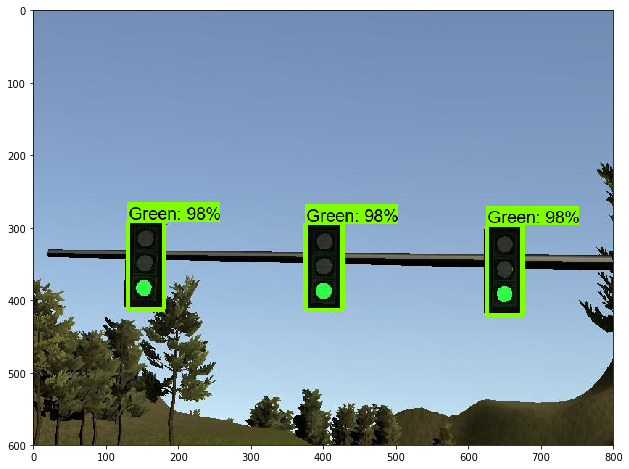

1
Green 0.9861725
Distance (metres) 0.0
Time in milliseconds 819.082498550415 

1
Green 0.9859649
Distance (metres) 0.0
Time in milliseconds 819.082498550415 

1
Green 0.983733
Distance (metres) 0.0
Time in milliseconds 819.082498550415 



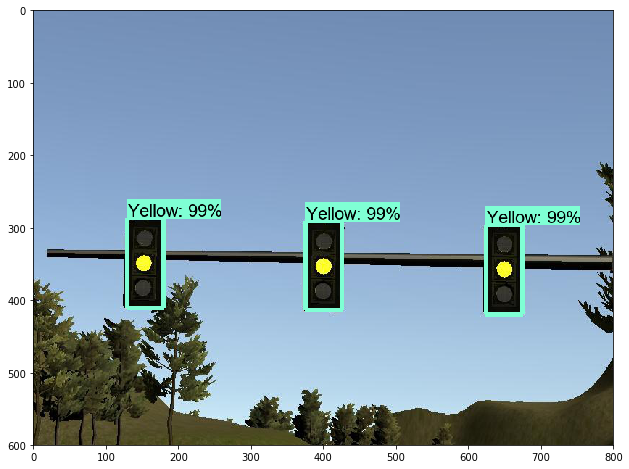

3
Yellow 0.99568695
Distance (metres) 0.0
Time in milliseconds 83.5580825805664 

3
Yellow 0.9924252
Distance (metres) 0.0
Time in milliseconds 83.5580825805664 

3
Yellow 0.99106395
Distance (metres) 0.0
Time in milliseconds 83.5580825805664 



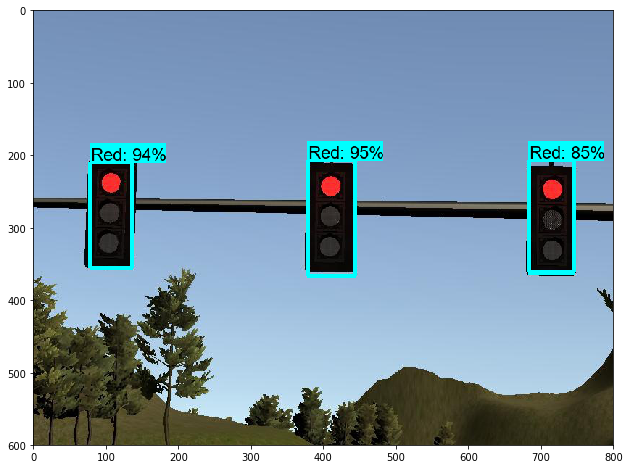

2
Red 0.9550223
Distance (metres) 0.0
Time in milliseconds 87.06140518188477 

2
Red 0.94410604
Distance (metres) 0.0
Time in milliseconds 87.06140518188477 

2
Red 0.85902184
Distance (metres) 0.0
Time in milliseconds 87.06140518188477 



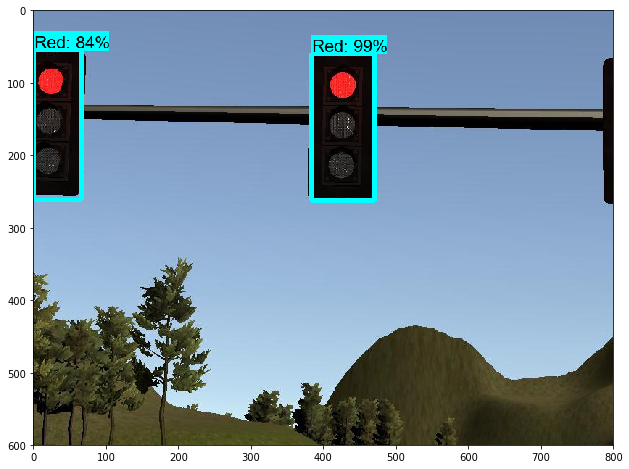

2
Red 0.9904288
Distance (metres) 0.0
Time in milliseconds 83.05811882019043 

2
Red 0.84969
Distance (metres) 0.0
Time in milliseconds 83.05811882019043 



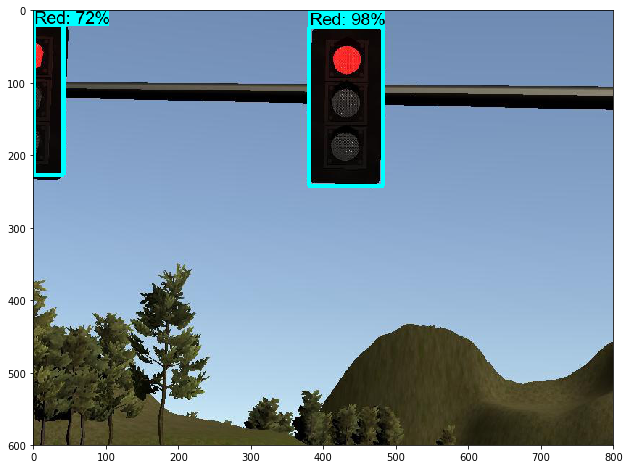

2
Red 0.98466796
Distance (metres) 0.0
Time in milliseconds 85.56103706359863 

2
Red 0.72527647
Distance (metres) 0.0
Time in milliseconds 85.56103706359863 



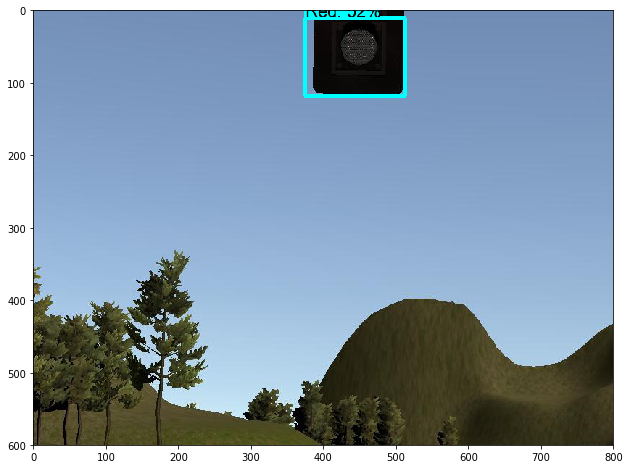

2
Red 0.5221043
Distance (metres) 0.0
Time in milliseconds 83.05835723876953 



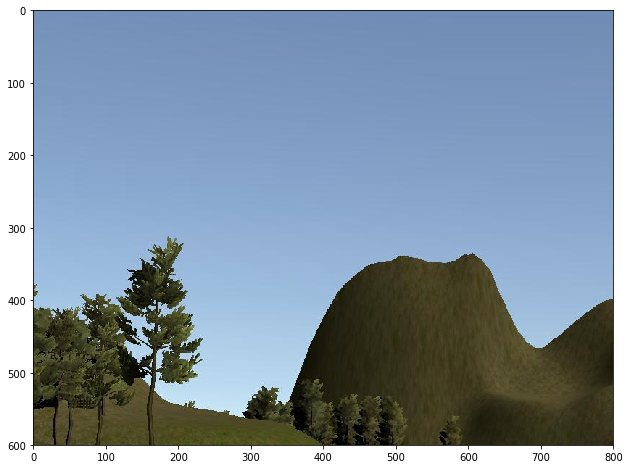

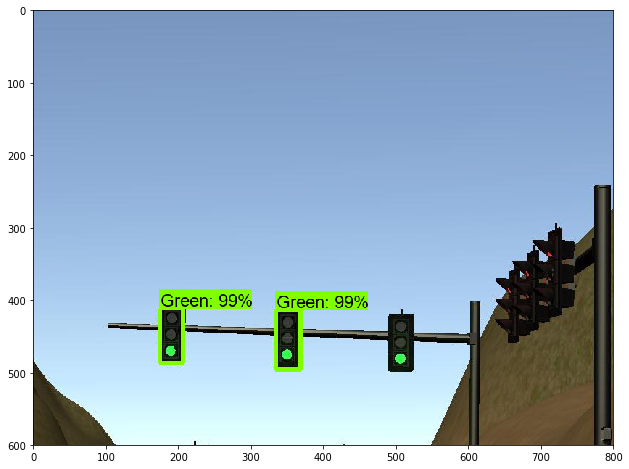

1
Green 0.99690765
Distance (metres) 0.0
Time in milliseconds 83.55927467346191 

1
Green 0.9950942
Distance (metres) 0.0
Time in milliseconds 83.55927467346191 



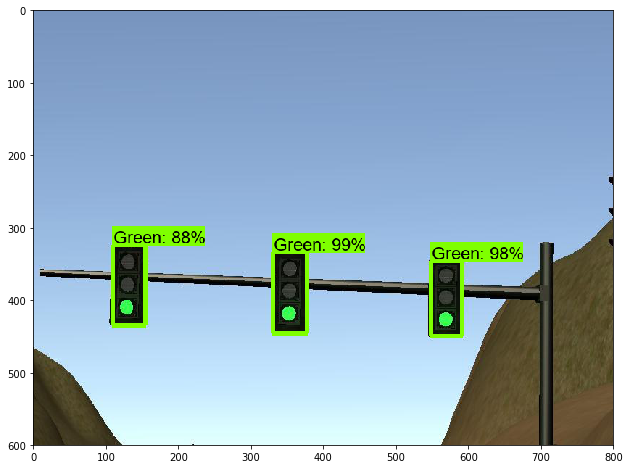

1
Green 0.9972256
Distance (metres) 0.0
Time in milliseconds 85.58917045593262 

1
Green 0.9855607
Distance (metres) 0.0
Time in milliseconds 85.58917045593262 

1
Green 0.8846148
Distance (metres) 0.0
Time in milliseconds 85.58917045593262 



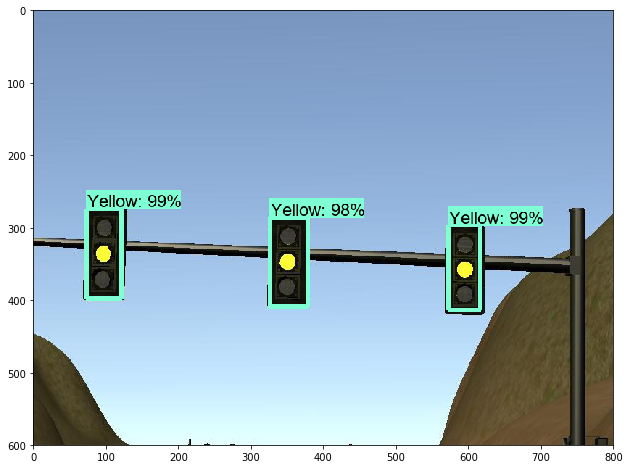

3
Yellow 0.99095684
Distance (metres) 0.0
Time in milliseconds 84.55896377563477 

3
Yellow 0.9903447
Distance (metres) 0.0
Time in milliseconds 84.55896377563477 

3
Yellow 0.98957765
Distance (metres) 0.0
Time in milliseconds 84.55896377563477 



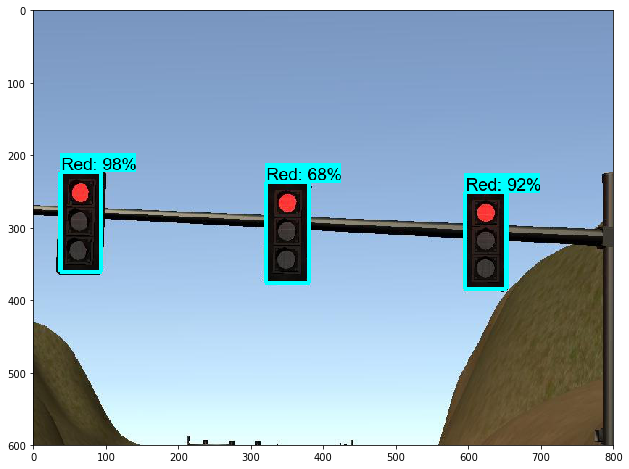

2
Red 0.9881495
Distance (metres) 0.0
Time in milliseconds 84.05900001525879 

2
Red 0.92929
Distance (metres) 0.0
Time in milliseconds 84.05900001525879 

2
Red 0.6869613
Distance (metres) 0.0
Time in milliseconds 84.05900001525879 



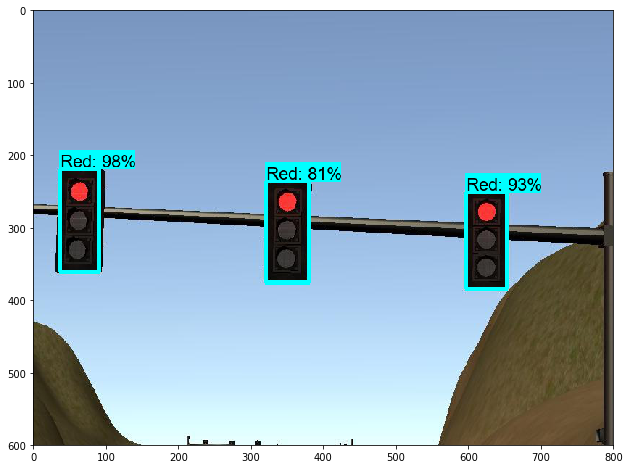

2
Red 0.9825476
Distance (metres) 0.0
Time in milliseconds 85.06035804748535 

2
Red 0.93434715
Distance (metres) 0.0
Time in milliseconds 85.06035804748535 

2
Red 0.8146168
Distance (metres) 0.0
Time in milliseconds 85.06035804748535 



In [9]:
detection_graph = import_graph(SIM_MODEL_PATH)
image_paths = load_test_images(SIM_TEST_IMAGE_PATH)
predict(detection_graph, image_paths)

## Detection: Real Test Pictures

data/test_images/real\*.jpg
Length of test images: 9


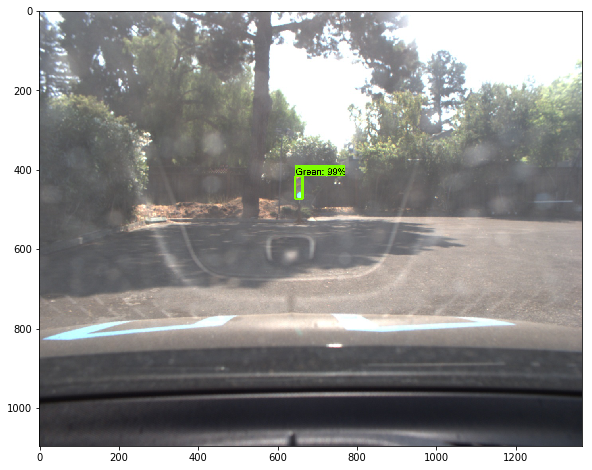

1
Green 0.9993723
Distance (metres) 0.0
Time in milliseconds 832.5917720794678 



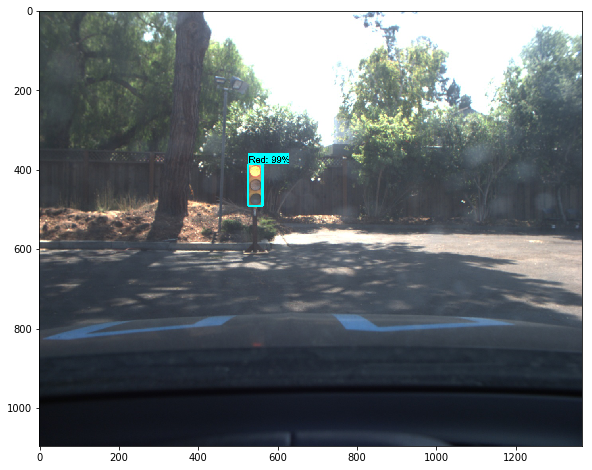

2
Red 0.996816
Distance (metres) 0.0
Time in milliseconds 107.61499404907227 



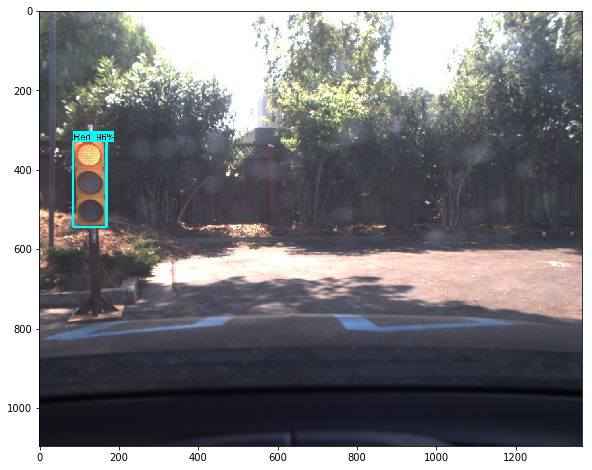

2
Red 0.9681037
Distance (metres) 0.0
Time in milliseconds 106.57477378845215 



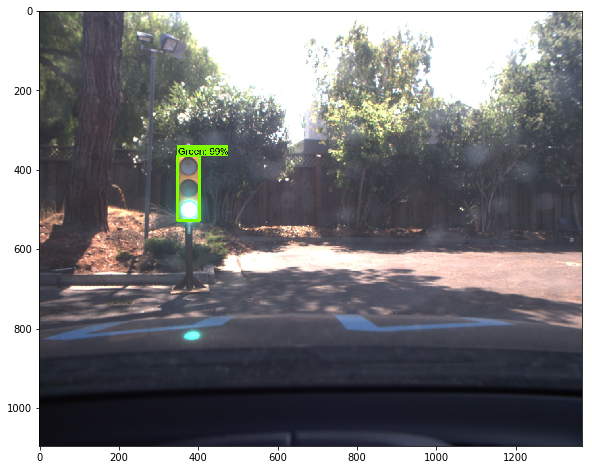

1
Green 0.99983895
Distance (metres) 0.0
Time in milliseconds 106.57596588134766 



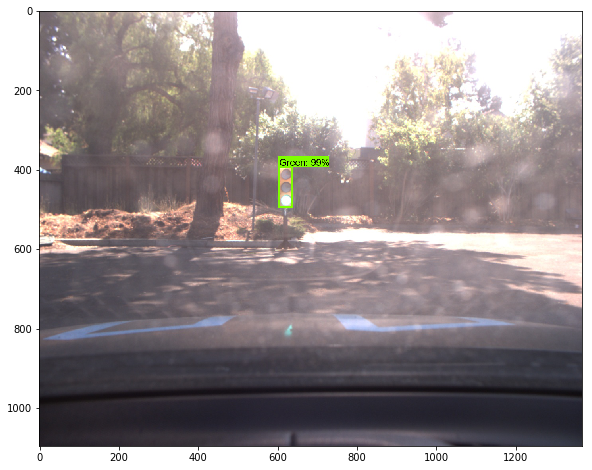

1
Green 0.9997614
Distance (metres) 0.0
Time in milliseconds 110.0778579711914 



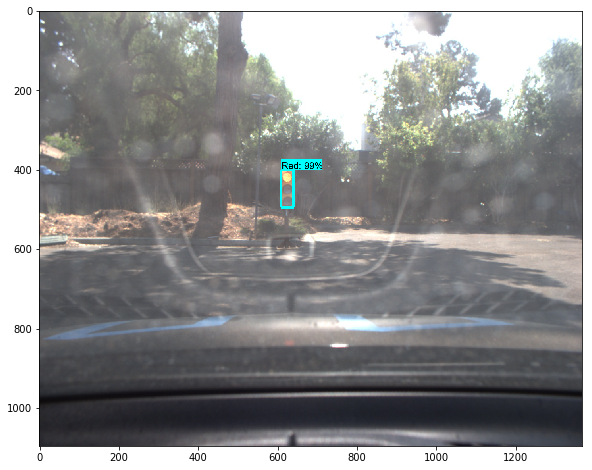

2
Red 0.999972
Distance (metres) 0.0
Time in milliseconds 106.57525062561035 



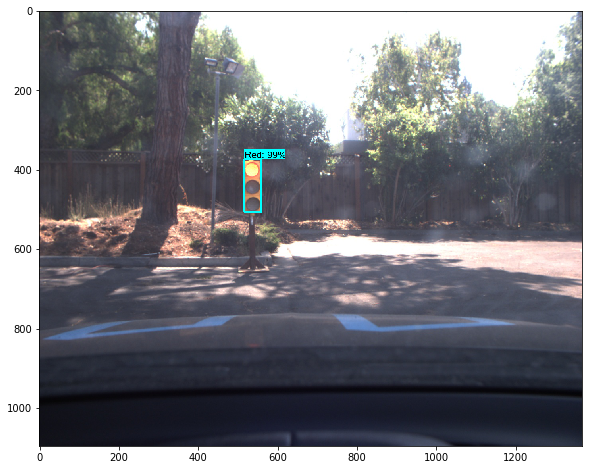

2
Red 0.99932885
Distance (metres) 0.0
Time in milliseconds 107.57684707641602 



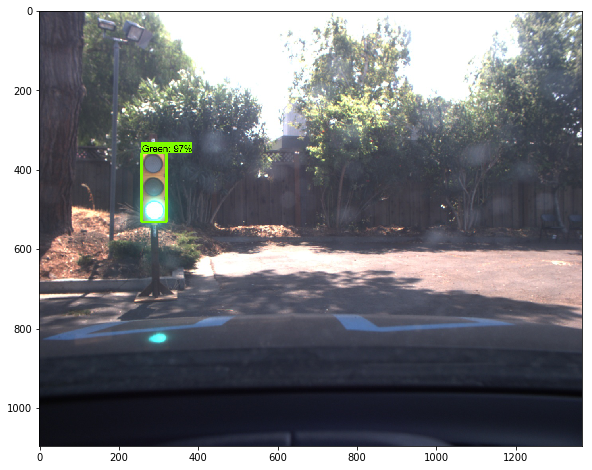

1
Green 0.97781
Distance (metres) 0.0
Time in milliseconds 110.57782173156738 



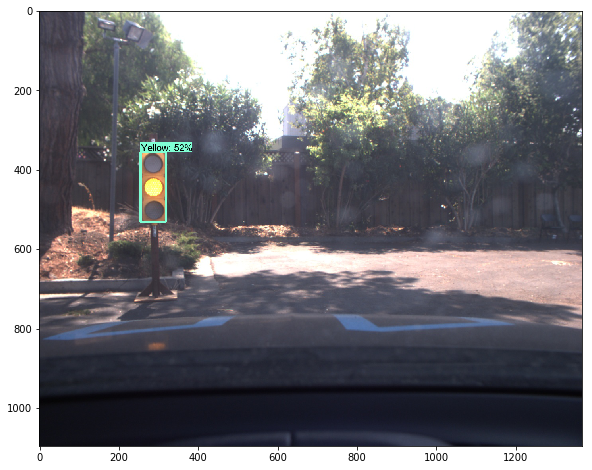

3
Yellow 0.52482533
Distance (metres) 0.0
Time in milliseconds 107.57589340209961 



In [10]:
detection_graph = import_graph(REAL_MODEL_PATH)
image_paths = load_test_images(REAL_TEST_IMAGE_PATH)
predict(detection_graph, image_paths)